## Cyclist Data Analysis 

In [1]:
# Importing necessary Libraries
try:
    import sys, os 

    import warnings
    warnings.filterwarnings("ignore")

    import numpy as np
    import pandas as pd

    import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline

    import statsmodels.api as sm
    from scipy.stats import ttest_ind, chi2_contingency, shapiro

    print("Modules Imported Successfully")
    
except Exception as err:
    print(err)

Modules Imported Successfully


In [2]:
# Importing the datasets (Last 12 months of the Cyclist Data)
try:
    Jan2022=pd.read_csv("C:/Users/tushar/OneDrive/Desktop/Google Data Analytics Professional Certificate/Course 8 - 22.02.2023 - Capstone/Week 2/Cyclistic Data/202201-divvy-tripdata.csv")
    Feb2022=pd.read_csv("C:/Users/tushar/OneDrive/Desktop/Google Data Analytics Professional Certificate/Course 8 - 22.02.2023 - Capstone/Week 2/Cyclistic Data/202202-divvy-tripdata.csv")
    March2022=pd.read_csv("C:/Users/tushar/OneDrive/Desktop/Google Data Analytics Professional Certificate/Course 8 - 22.02.2023 - Capstone/Week 2/Cyclistic Data/202203-divvy-tripdata.csv")
    Apr2022=pd.read_csv("C:/Users/tushar/OneDrive/Desktop/Google Data Analytics Professional Certificate/Course 8 - 22.02.2023 - Capstone/Week 2/Cyclistic Data/202204-divvy-tripdata.csv")
    May2022=pd.read_csv("C:/Users/tushar/OneDrive/Desktop/Google Data Analytics Professional Certificate/Course 8 - 22.02.2023 - Capstone/Week 2/Cyclistic Data/202205-divvy-tripdata.csv")
    June2022=pd.read_csv("C:/Users/tushar/OneDrive/Desktop/Google Data Analytics Professional Certificate/Course 8 - 22.02.2023 - Capstone/Week 2/Cyclistic Data/202206-divvy-tripdata.csv")
    July2022=pd.read_csv("C:/Users/tushar/OneDrive/Desktop/Google Data Analytics Professional Certificate/Course 8 - 22.02.2023 - Capstone/Week 2/Cyclistic Data/202207-divvy-tripdata.csv")
    Aug2022=pd.read_csv("C:/Users/tushar/OneDrive/Desktop/Google Data Analytics Professional Certificate/Course 8 - 22.02.2023 - Capstone/Week 2/Cyclistic Data/202208-divvy-tripdata.csv")
    Sept2022=pd.read_csv("C:/Users/tushar/OneDrive/Desktop/Google Data Analytics Professional Certificate/Course 8 - 22.02.2023 - Capstone/Week 2/Cyclistic Data/202209-divvy-publictripdata.csv")
    Oct2022=pd.read_csv("C:/Users/tushar/OneDrive/Desktop/Google Data Analytics Professional Certificate/Course 8 - 22.02.2023 - Capstone/Week 2/Cyclistic Data/202210-divvy-tripdata.csv")
    Nov2022=pd.read_csv("C:/Users/tushar/OneDrive/Desktop/Google Data Analytics Professional Certificate/Course 8 - 22.02.2023 - Capstone/Week 2/Cyclistic Data/202211-divvy-tripdata.csv")
    Dec2022=pd.read_csv("C:/Users/tushar/OneDrive/Desktop/Google Data Analytics Professional Certificate/Course 8 - 22.02.2023 - Capstone/Week 2/Cyclistic Data/202212-divvy-tripdata.csv")
    print("Data Imported Successfully")

except Exception as err:
    print(err)

Data Imported Successfully


In [3]:
# Checking the glimpse of the first data before merging all the data into one dataframe.
Jan2022.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [4]:
# Defining a function to check if the column names in all the dataframes are equal, before merging them into one dataframe.
def check_column_names(dataframes):
    # Extract column names from the first dataframe
    reference_columns = set(dataframes[0].columns)

    # Iterate over the remaining dataframes
    for i, df in enumerate(dataframes[1:], start=2):
        # Extract column names from the current dataframe
        current_columns = set(df.columns)

        # Check if the current dataframe"s column names match the reference
        if current_columns != reference_columns:
            print(f"Column names in DataFrame {i} do not match the reference DataFrame.")
            return False

    return True

In [5]:
# Creating a list of the last 12 months dataframe
dataframes=[Jan2022, Feb2022, March2022, Apr2022, May2022, June2022, July2022, Aug2022, Sept2022, Oct2022, Nov2022, Dec2022]

In [6]:
if check_column_names(dataframes=dataframes):
    df = pd.concat(dataframes, ignore_index=True)
    print("Dataframes merged into one dataframe")
else:
    print("Dataframes do not have the same column names. Cannot merge.")

Dataframes merged into one dataframe


### Now, all the dataframes are merged, starting the data analysis process

## 1.) Data Cleaning & Preparing

In [7]:
# Checking the first few of rows to have an idea of our final data.
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [8]:
# Checking the shape of the data
df.shape
# There are total 5667717 rows and 13 columns.

(5667717, 13)

In [9]:
# Found that the column name are not in an understandable way, so changing the column names.
df.rename(columns={
    "ride_id": "Ride_ID",
    "rideable_type": "Rideable_Type",
    "started_at": "Start_Date",
    "ended_at": "End_Date",
    "start_station_name": "Start_Station_Name",
    "start_station_id": "Start_Station_ID",
    "end_station_name": "End_Station_Name",
    "end_station_id": "End_Station_ID",
    "start_lat": "Start_Latitude",
    "start_lng": "Start_Longitude",
    "end_lat": "End_Latitude",
    "end_lng": "End_Longitude",
    "member_casual": "Member_Type"}, inplace=True)

In [10]:
# Checking the basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Ride_ID             object 
 1   Rideable_Type       object 
 2   Start_Date          object 
 3   End_Date            object 
 4   Start_Station_Name  object 
 5   Start_Station_ID    object 
 6   End_Station_Name    object 
 7   End_Station_ID      object 
 8   Start_Latitude      float64
 9   Start_Longitude     float64
 10  End_Latitude        float64
 11  End_Longitude       float64
 12  Member_Type         object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


In [11]:
# As it can be seen that the columns started_at and ended_at are not in an appropriate data type i.e date.
# So, changing the data type of these columns to date format.

df["Start_Date"] = pd.to_datetime(df["Start_Date"])
df["End_Date"] = pd.to_datetime(df["End_Date"])

In [12]:
# Verifying the data type conversion
df.dtypes

Ride_ID                       object
Rideable_Type                 object
Start_Date            datetime64[ns]
End_Date              datetime64[ns]
Start_Station_Name            object
Start_Station_ID              object
End_Station_Name              object
End_Station_ID                object
Start_Latitude               float64
Start_Longitude              float64
End_Latitude                 float64
End_Longitude                float64
Member_Type                   object
dtype: object

In [13]:
# Checking how many null records are there in the dataframe
round(df.isnull().sum()/len(df)*100,2)

Ride_ID                0.00
Rideable_Type          0.00
Start_Date             0.00
End_Date               0.00
Start_Station_Name    14.70
Start_Station_ID      14.70
End_Station_Name      15.75
End_Station_ID        15.75
Start_Latitude         0.00
Start_Longitude        0.00
End_Latitude           0.10
End_Longitude          0.10
Member_Type            0.00
dtype: float64

### As the percent of the null records is relatively less i.e approx 15% and 0.1%, so dropping the same from the dataframe, as they will not impact our analysis.

In [14]:
# Using Dropna function to drop all the null rows from the mentions columns.
null_rows_to_drop=["Start_Station_Name","Start_Station_ID","End_Station_Name","End_Station_ID","End_Latitude","End_Longitude"]
df.dropna(subset=null_rows_to_drop, inplace=True)

In [15]:
# Verifying the dropped null values
df.isnull().sum()

Ride_ID               0
Rideable_Type         0
Start_Date            0
End_Date              0
Start_Station_Name    0
Start_Station_ID      0
End_Station_Name      0
End_Station_ID        0
Start_Latitude        0
Start_Longitude       0
End_Latitude          0
End_Longitude         0
Member_Type           0
dtype: int64

In [16]:
# Checking if there are any duplicate records present in the data.
df.duplicated().sum()

0

### There aren"t any duplicate records in the data.

In [17]:
df.head()

,Ride_ID,Rideable_Type,Start_Date,End_Date,Start_Station_Name,Start_Station_ID,End_Station_Name,End_Station_ID,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Member_Type
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [18]:
# Running a loop over all the object columns to check the unique values to remove any unwanted characters from the data.
for col in df.select_dtypes(object):
    print(f"{col}: ", df[col].unique(),"\n")

Ride_ID:  ['C2F7DD78E82EC875' 'A6CF8980A652D272' 'BD0F91DFF741C66D' ...
 'A2BECB88430BE156' '37B392960E566F58' '2DD1587210BA45AE'] 

Rideable_Type:  ['electric_bike' 'classic_bike' 'docked_bike'] 

Start_Station_Name:  ['Glenwood Ave & Touhy Ave' 'Sheffield Ave & Fullerton Ave'
 'Clark St & Bryn Mawr Ave' ... 'Public Rack - Maplewood Ave & 63rd St'
 'Public Rack - Wentworth Ave & 79th St'
 'Public Rack - 63rd & Western Ave S'] 

Start_Station_ID:  ['525' 'TA1306000016' 'KA1504000151' ... '982' '1022' '1029'] 

End_Station_Name:  ['Clark St & Touhy Ave' 'Greenview Ave & Fullerton Ave'
 'Paulina St & Montrose Ave' ... 'Public Rack - 63rd & Western Ave S'
 'Public Rack - Ashland Ave & 74th St'
 'Public Rack - Commercial Ave & 89th St'] 

End_Station_ID:  ['RP-007' 'TA1307000001' 'TA1309000021' ... '936' '635' '1071'] 

Member_Type:  ['casual' 'member'] 



### Some values in the start_station_id and end_station_id are not in a desired format. But those column won't make any impact in the analysis. So we can leave it as it is.

In [19]:
# Creating columns by mapping the values to month name and weekday with the help of start_date column.

# Created a dictionary to map datetime values to weekday and month names
weekday_names = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}

month_names = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September",
               10: "October", 11: "November", 12: "December"}

df["WeekDay"] = df["Start_Date"].dt.weekday.map(weekday_names)
df["Month"] = df["Start_Date"].dt.month.map(month_names)

In [20]:
# Using Start time and end time, creating an another column as ride_length in minutes by calculating the difference between start & end time.

df["Ride_Length_Minutes"] = round((df["End_Date"] - df["Start_Date"]).dt.total_seconds()/60,2)

In [21]:
# Verifying if the new columns are generated.
df.head()

,Ride_ID,Rideable_Type,Start_Date,End_Date,Start_Station_Name,Start_Station_ID,End_Station_Name,End_Station_ID,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Member_Type,WeekDay,Month,Ride_Length_Minutes
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,Thursday,January,2.95
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,Monday,January,4.35
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,Tuesday,January,4.35
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,Tuesday,January,14.93
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,Thursday,January,6.03


### There are some rows in which the values of ride length is in negative, so dropping the same, as they won't be significant for the analysis.

In [22]:
# Using drop function to drop rows where ride length is less than 0.
df.drop(df[df["Ride_Length_Minutes"]<0].index,inplace=True)

In [23]:
# After removing all the unnecessary rows, lets check the number of rows left.
df.shape[0]

4369291

## 2.) Data Analysis

 ### 2.1 Hypothesis Testing

<font size=4>1st Hypothesis: Checking if there is any significant difference between the average ride length of casual riders and anual members.

<font size=4>Null Hypothesis (H0): The average ride length of casual riders is equal to the average ride length of member riders.<br>
Alternative Hypothesis (H1): The average ride length of casual riders is greater than the average ride length of member riders.

In [24]:
# Spliting the data into two groups
casual_riders = df[df["Member_Type"] == "casual"]
member_riders = df[df["Member_Type"] == "member"]

# Performing the t-test using two-sample t-test.
t_stat, p_value = ttest_ind(casual_riders["Ride_Length_Minutes"], member_riders["Ride_Length_Minutes"])
print(p_value)

# Setting the significance level
alpha = 0.05

# Checking the results
if p_value < alpha:
    print("We Reject the null hypothesis. The average ride length of the casual riders is greater than the anual members.")
else:
    print("We Failed to reject the null hypothesis. There is no statistically significant difference in ride lengths.")

0.0
We Reject the null hypothesis. The average ride length of the casual riders is greater than the anual members.


<font size=4>After performing the hypothesis testing, we found that the average ride length of causual riders in greater than the average ride length of anual members, which can help in building some strategies such as Ride-length-based pricing, targeted marketing campaigns, Loyalty Programs etc.

<font size=4>2nd Hypothesis: To check if there is difference in the choice of bike type among both the members.

<font size=4>Null Hypothesis (H0): The choice of bike type (classic, electric or docked) is independent of rider type (casual or annual member).<br>
Alternate Hypothesis (H1): The choice of bike type is not independent of rider type.

In [25]:
# Testing Hypothesis using Chi-Square Test

# Creatinging a contingency table
contingency_table = pd.crosstab(df["Member_Type"], df["Rideable_Type"])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Setting the significance level (alpha)
alpha = 0.05

# Printing the results
print("Chi-Squared Statistic:", chi2)
print("p-value:", p)

# Checking if the p-value is less than alpha to reject the null hypothesis
if p < alpha/2:
    print("Reject the null hypothesis: There is a significant association between rider type and bike type.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between rider type and bike type.")

Chi-Squared Statistic: 305868.07933020085
p-value: 0.0
Reject the null hypothesis: There is a significant association between rider type and bike type.


In [26]:
contingency_table

Rideable_Type,classic_bike,docked_bike,electric_bike
Member_Type,,,
casual,888764,174858,694528
member,1708634,0,902507


<font size=4>Based on the test and analyzing the contigency table, we found that there is a significant association between rider type and bike type. Both the members prefer classic bike more as compared to other bikes, which could help the cyclist to build some strategies such as promoting classic bikes, increasing the availability of classic bikes at all stations, providing discounts for riding classic bikes etc.

### 2.1 Univariate Analysis

#### 2.1.1 Continuous Variables

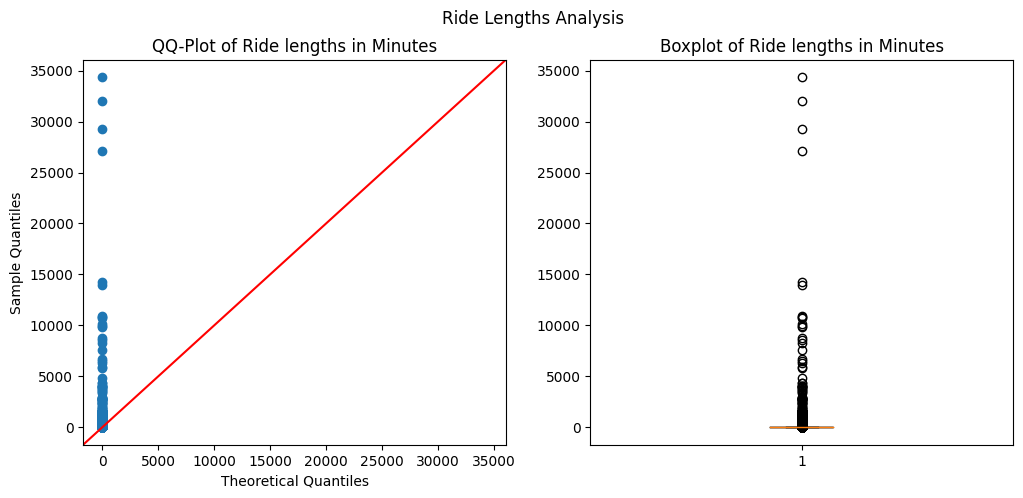

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sm.qqplot(df["Ride_Length_Minutes"], line="45", ax=axs[0])
axs[0].set_title("QQ-Plot of Ride lengths in Minutes")

axs[1].boxplot(df["Ride_Length_Minutes"])
axs[1].set_title("Boxplot of Ride lengths in Minutes")

fig.suptitle("Ride Lengths Analysis")

plt.show()

In [28]:
# Performing a Shapiro-Wilk test to confirm the normality of the distribution.
stat, p_value = shapiro(df["Ride_Length_Minutes"])
print(f"Shapiro-Wilk Test (Log-Transformed): Statistic={stat}, p-value={p_value}")

Shapiro-Wilk Test (Log-Transformed): Statistic=0.14294421672821045, p-value=0.0


In [29]:
#Since the p-value after performing shapiro-wilk test less than 0.05, we can say that our data is not normal.

### Interpretaion:
1. The distribution of Ride Lengths in Minutes, is not following a normal distribution (Visualized using QQ-Plot as well as shapiro wilk test).

#### 2.1.2 Categorical Variables 

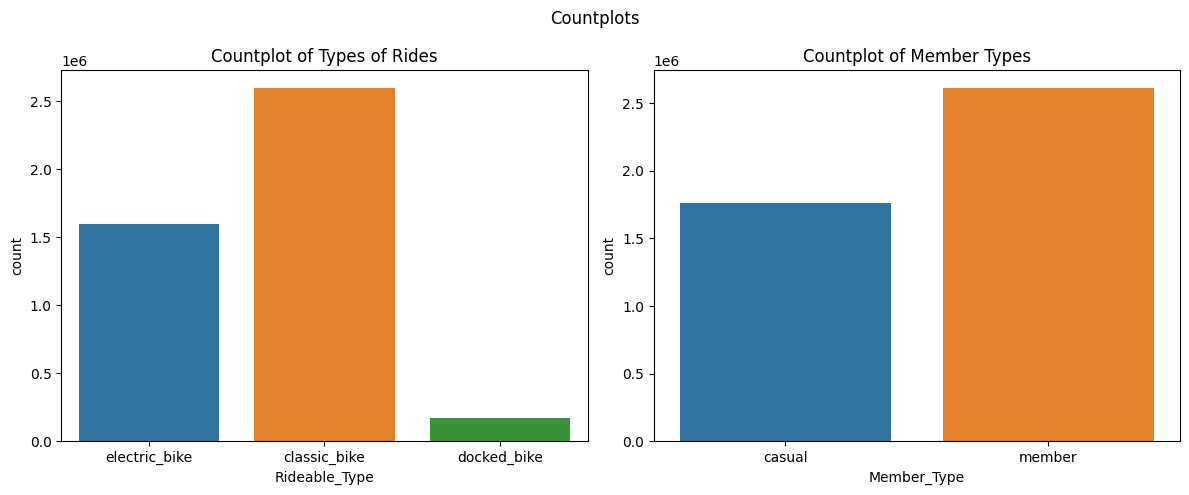

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.countplot(data=df, x="Rideable_Type", ax=axs[0])
axs[0].set_title("Countplot of Types of Rides")

sns.countplot(data=df, x="Member_Type", ax=axs[1])
axs[1].set_title("Countplot of Member Types")

fig.suptitle("Countplots")
plt.tight_layout()
plt.show()

### Interpretations:
1. The most preferred Bike type by the riders happens to be the classic bike, while the least preferred bike happens to be Docked Bike.
2. The data consisted of only those who have the annual membership of the Cyclist.

#### 2.1.3 Time-Series Analysis

In [31]:
WeekDay_counts=df.groupby("WeekDay")["Ride_ID"].count()
Ride_count_by_Month = df.groupby("Month").size()

In [32]:
# Reindexing the index in ride count by month to sort the months
months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
Ride_count_by_Month = Ride_count_by_Month.reindex(months_order)

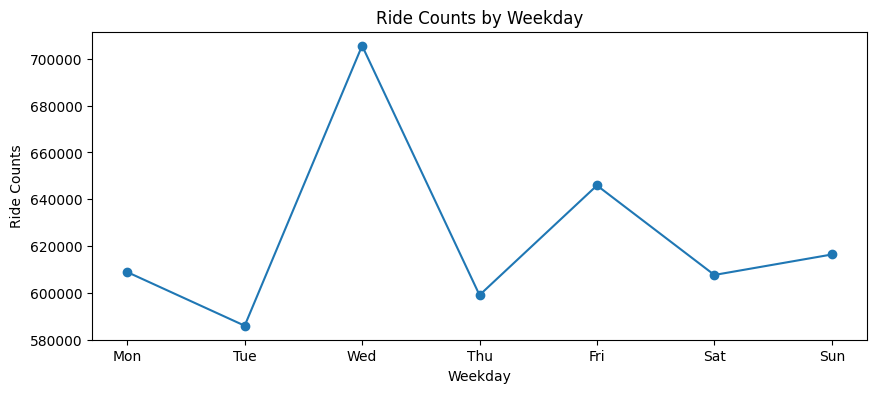

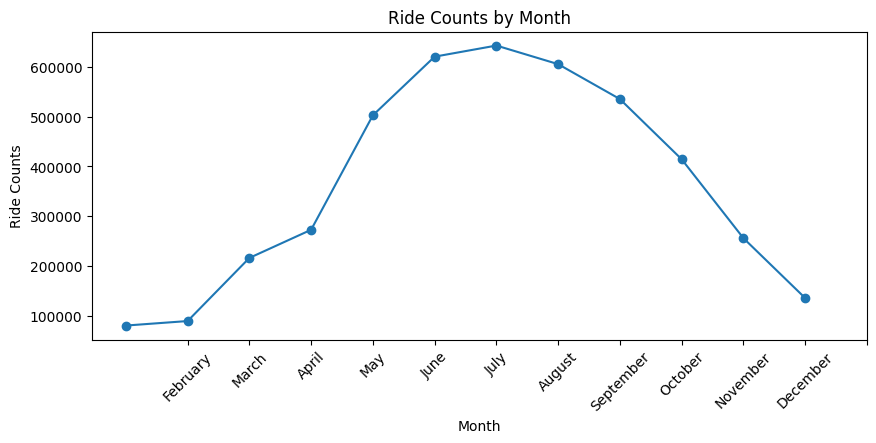

In [33]:
plt.figure(figsize=(10, 4))
plt.plot(WeekDay_counts.index, WeekDay_counts.values, marker="o")
plt.xlabel("Weekday")
plt.ylabel("Ride Counts")
plt.title("Ride Counts by Weekday")
plt.xticks(range(7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()

# Time series plot for average ride length by month
plt.figure(figsize=(10, 4))
plt.plot(Ride_count_by_Month.index, Ride_count_by_Month.values, marker="o")
plt.xlabel("Month")
plt.ylabel("Ride Counts")
plt.title("Ride Counts by Month")
plt.xticks(range(1, 13), rotation=45 )
plt.show()

### Interpretations:
1. Wednesdays have the highest ride counts registered, while Tuesdays have the lowest.
2. June, July and August are the months in which riders tend to ride the most. And here, we can see that after a uptrend in the ride counts there is a massive decline in the ride counts starting from the month of September.


### 2.2 Bivariate Analysis

Using Heatmap to visualize the correaltion between the continuous features.

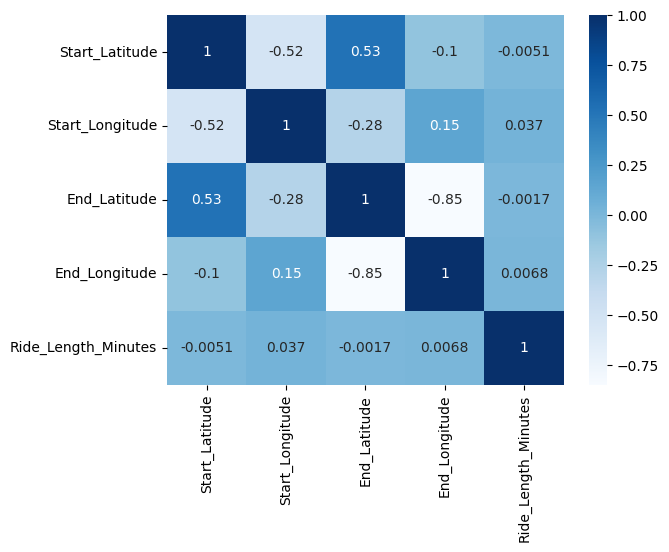

In [34]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues", linecolor="Black")
plt.show()

### Interpretations:
1. By analyzing the correaltion matrix, we can see that only "End Longitude" and "End latitude" are the only features that have a strong correaltion (Negative). While, other features don"t have very high correlation.

In [35]:
avg_ride_length_by_type = df.groupby("Rideable_Type")["Ride_Length_Minutes"].mean()
avg_ride_length_by_member_type = df.groupby("Member_Type")["Ride_Length_Minutes"].mean()
avg_ride_length_by_day = df.groupby("WeekDay")["Ride_Length_Minutes"].mean()
avg_ride_length_by_month = df.groupby("Month")["Ride_Length_Minutes"].mean()
avg_ride_length_by_month = avg_ride_length_by_month.reindex(months_order) # To sort the months name

In [36]:
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
avg_ride_length_by_day = avg_ride_length_by_day.reindex(days_order) # To sort the Weekdays Name

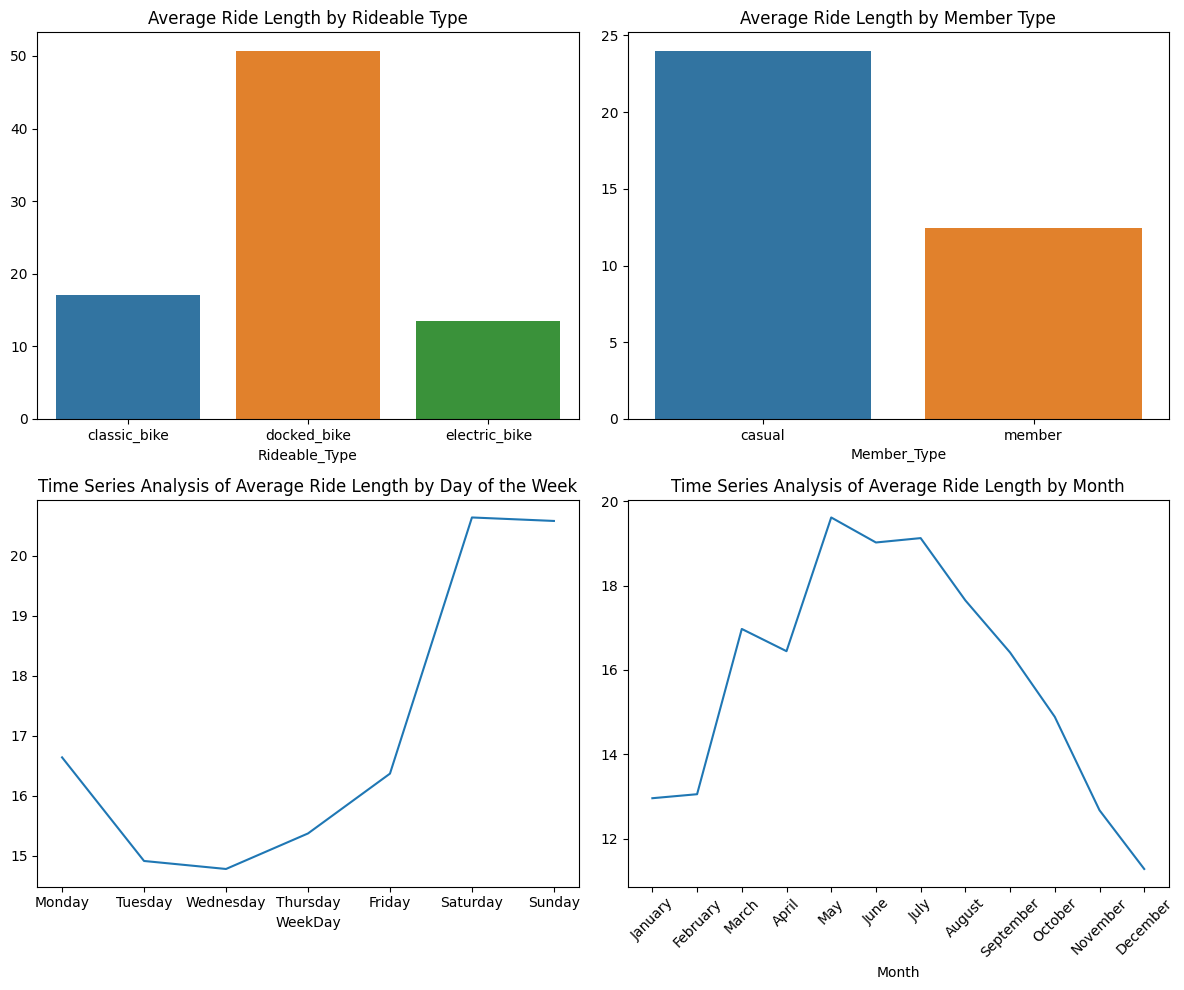

In [37]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

sns.barplot(x=avg_ride_length_by_type.index, y=avg_ride_length_by_type.values, ax=axs[0,0])
axs[0,0].set_title("Average Ride Length by Rideable Type")

sns.barplot(x=avg_ride_length_by_member_type.index, y=avg_ride_length_by_member_type.values, ax=axs[0,1])
axs[0,1].set_title("Average Ride Length by Member Type")

sns.lineplot(x=avg_ride_length_by_day.index, y=avg_ride_length_by_day.values, ax=axs[1,0])
axs[1,0].set_title("Time Series Analysis of Average Ride Length by Day of the Week")

sns.lineplot(x=avg_ride_length_by_month.index, y=avg_ride_length_by_month.values, ax=axs[1,1])
axs[1,1].set_title("Time Series Analysis of Average Ride Length by Month")
plt.setp(axs[1, 1].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

### Interpretations:
1. Comparing the Average ride length among the bike types, we found the riders who use Docked bike, have the highest average ride length as compared to classic bikes and electric bikes. Even though the riders ride less using the docked bikes, but if they ride, they ride to longest. This might be due to comfortability they have while riding or they feel safe while riding the docked bike because docked bikes are designed to be locked or secured from unauthorized use.
2. Comparing the average ride length among the member types, we found that the casual riders tend to spend higher time in riding the bikes as compared to annual member riders. This could infer that many riders prefer to ride occasionally or in times where they need to travel a far distance. Annual members on the other hand might use the bikes for their day to day operations.
3. Analyzing the Average ride lengths by the day of week, we can see that there is a massive hike in the ride lengths on the weekends, making it obvious to infer that riders enjoy riding on the weekends as compared to the weekdays.
4. Analyzing the Average ride lengths by the months, we can see a clear uptrend in the average ride lenghts till the month of July, and a massive decline starting from the month of August, which could mean that after the month of August, the winter season starts which makes riders to ride less.

In [38]:
df.head()

,Ride_ID,Rideable_Type,Start_Date,End_Date,Start_Station_Name,Start_Station_ID,End_Station_Name,End_Station_ID,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Member_Type,WeekDay,Month,Ride_Length_Minutes
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,Thursday,January,2.95
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,Monday,January,4.35
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,Tuesday,January,4.35
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,Tuesday,January,14.93
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,Thursday,January,6.03


### 2.3 Multivariate Analysis

In [39]:
member_ride_length = df.groupby(['Rideable_Type', 'Member_Type'])['Ride_Length_Minutes'].mean().reset_index()
day_ride_length = df.groupby(['Rideable_Type', 'WeekDay'])['Ride_Length_Minutes'].mean().reset_index()
month_ride_length = df.groupby(['Member_Type', 'Month'])['Ride_Length_Minutes'].mean().reset_index()

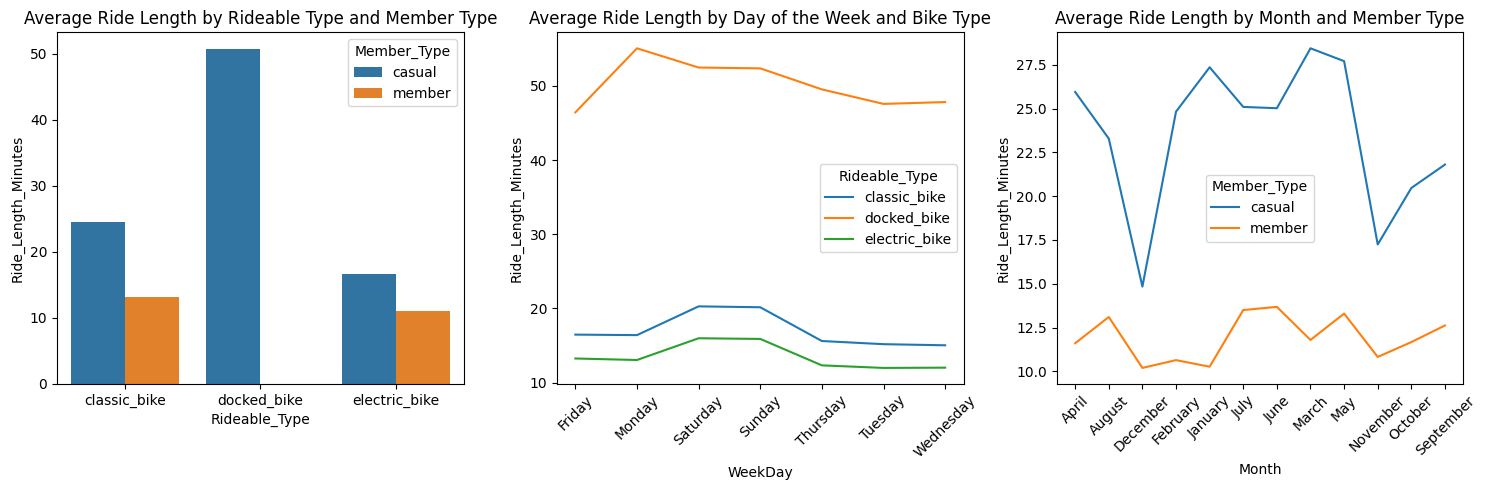

In [50]:
fig, axs = plt.subplots(nrows=1,ncols=3, figsize=(15,5))

sns.barplot(data=member_ride_length, x="Rideable_Type", y="Ride_Length_Minutes", hue="Member_Type", ax=axs[0])
axs[0].set_title("Average Ride Length by Rideable Type and Member Type")

sns.lineplot(data=day_ride_length, x="WeekDay", y="Ride_Length_Minutes", hue="Rideable_Type", ax=axs[1])
axs[1].set_title("Average Ride Length by Day of the Week and Bike Type")
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)

sns.lineplot(data=month_ride_length, x="Month", y="Ride_Length_Minutes", hue="Member_Type", ax=axs[2])
axs[2].set_title("Average Ride Length by Month and Member Type")
plt.setp(axs[2].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

### Interpretations:
1. Among both of the member types, casual members are maintaining the highest average ride length in all of the bike types (Classic, Docked, and Electric). It can also been seen that annual members don't really use docked bikes, rather they prefer classic and electric bikes only.
2. During all of the weekdays, Docked bikes have the highest ride lengths, making it more clear that riders prefer docked bikes more as compared to other two types, especially the casual riders.
3. Comparing the average ride lengths by months, here also the casual riders tend to ride more (in terms of ride length) than the annual members. The average ride lengths among the annual members in each month is more or less the same. In other words, they are maintaining the average ride lengths over the months.

## Overall Analysis:

---

### 1. Objective:

Cyclistic, a bike-share company in Chicago, aimed to maximize annual memberships for future growth. The analysis focused on understanding the behavior of casual riders and annual members, providing insights to design a targeted marketing strategy.

### 2. Data Overview:

The dataset comprises 5,667,717 rows and 13 columns. Data types include object, float64, and datetime. Cleaning steps involved handling null values in station-related columns and converting date columns to datetime format.

### 3. Hypothesis Testing:

- 1st Hypothesis: Conducted a one-tailed t-test comparing the average ride lengths of casual and annual members.
  - Results: The Average Ride Length of the causal riders is more than the annual members.

- 2nd Hypothesis: Conducted a Two-tailes chi-square test to check if there is difference in the choice of bike type among both   the members.
  - Results: The choice of bike type is not independent of rider type.

### 4. Univariate Analysis Summary:

- **Ride Lengths Distribution:**
  - The distribution of ride lengths in minutes is not normal.
  
- **Bike Type Preferences:**
  - Classic bikes are the most preferred, followed by electric bikes and docked bikes.
  
- **Member Types:**
  - The majority of riders have an annual membership.
  
- **Time Data Analysis:**
  - Wednesdays have the highest ride counts, and June, July, and August see the most rides.

### 5. Bivariate Analysis Summary:

- **Correlation:**
  - Only "End Longitude" and "End Latitude" show a strong negative correlation.
  
- **Bike Type vs. Average Ride Length:**
  - Docked bikes have the highest average ride length.
  
- **Member Type vs. Average Ride Length:**
  - Casual riders have a higher average ride length than annual members.
  
- **Day of the Week vs. Average Ride Length:**
  - Weekends exhibit a significant increase in average ride lengths.

### 6. Multivariate Analysis Summary:

- **Rideable Type vs. Member Type vs. Average Ride Length:**
  - Casual members maintain the highest average ride length across all bike types.
  
- **Rideable Type vs. Day of Week vs. Average Ride Length:**
  - Docked bikes consistently have the highest average ride lengths on all days.
  
- **Member Type vs. Month vs. Average Ride Length:**
  - Casual riders tend to have higher average ride lengths throughout the months.

### 7. Insights and Patterns:

- **Overall Trends:**
  - Docked bikes and casual riders consistently have higher average ride lengths.
  
- **Weekend Effect:**
  - Ride lengths increase notably on weekends, suggesting a leisure trend.

### 8. Recommendations:

- **Targeted Marketing:**
  - Promotional Offers: Introduce limited-time promotional offers for annual memberships, enticing casual riders to transition.
  - Discount Bundles: Offer discounted bundles, combining memberships with local partnerships like fitness clubs or cafes.
  - Referral Programs: Launch referral programs providing incentives for members to bring in new annual subscribers.
  
- **Pricing Strategies:**
  - Occasional Promotions: Periodically offer promotions or discounts for upgrading to annual memberships during peak riding    seasons.
  - Special Pricings: Introduce special pricing options for longer ride lenghts in annual membership to encourage membership conversion.
  - Limits: Consider limits for casual riders, prompting membership for unlimited rides.
  - Free Trials: Implement free trial periods for annual memberships, allowing potential members to experience the benefits before committing.

### 9. Conclusion:

The analysis provides valuable insights into rider behavior, highlighting opportunities to increase annual memberships. Understanding bike preferences, ride lengths, and temporal trends allows for strategic decision-making in marketing and pricing.